# Pandas Homework, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

James Wilde

6/19/25

## Do your importing and your setup

In [1]:
import pandas as pd
import re
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values=["Unknown", "UNKNOWN", "", " "])

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(30000, 15)

81937 rows originally, so I capped it at 30K.

In [4]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [5]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog. `Animal Name` is the dog's name. `Primary Breed` is the dog' primary breed.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

Three potential questions:

1) What are the most common breeds in the dataset?

2) Where are the zip codes of the owners?

3) How old are the dogs?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

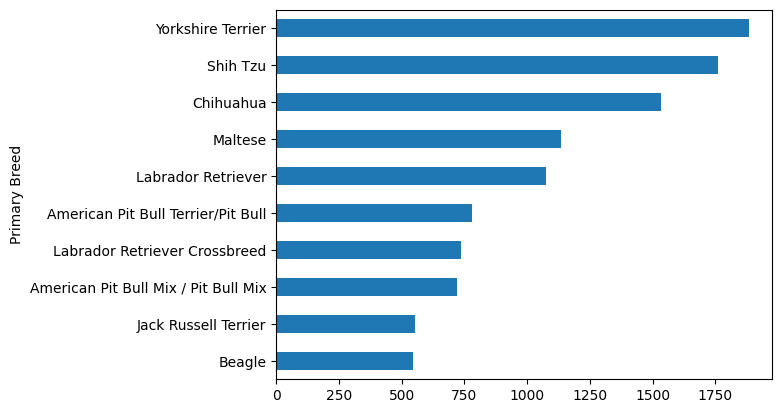

In [6]:
df['Primary Breed'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

(At this point, I went back and read in the data again while counting 'Unknown' as a null value.)

<Axes: ylabel='Primary Breed'>

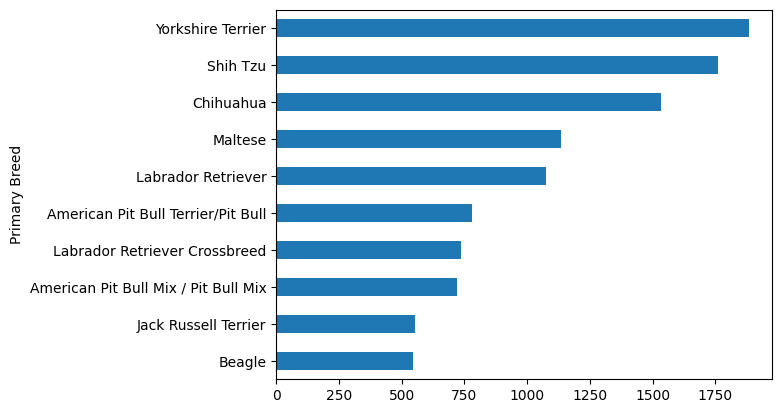

In [7]:
df['Primary Breed'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

## What are the most popular dog names?

In [8]:
df['Animal Name'].value_counts().sort_values(ascending=False).head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [9]:
df[df['Animal Name'] == 'James']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
1197,10014,James,M,Wheaton Terrier,NaN,Cream,Gray,NaN,2011-09-01,Yes,No,Yes,2014-12-12 12:59:04.977,2014-12-12,2016-12-09
1985,11238,James,M,Jack Russell Terrier,NaN,WHITE,BROWN,NaN,2013-01-01,Yes,No,Yes,2015-02-14 12:24:31.177,2015-02-14,2017-03-29
5656,10034,James,M,Dachshund Smooth Coat,NaN,RED,NaN,NaN,2011-10-01,Yes,No,Yes,2015-05-04 08:33:16.047,2015-05-04,2016-05-05
8413,10025,James,M,Beagle,NaN,BROWN,WHITE,BLACK,2011-03-01,Yes,No,Yes,2015-05-21 11:28:34.297,2015-05-21,2016-05-31
18797,10002,James,M,Chihuahua,NaN,Tan,NaN,NaN,2015-04-01,Yes,NaN,Yes,2015-07-07 17:06:32.787,2015-07-07,2016-07-07
22394,10025,James,M,Chihuahua,NaN,BROWN,GRAY,NaN,2010-01-01,Yes,No,Yes,2015-07-23 17:54:16.873,2015-07-23,2016-09-01


There are 6 dogs with my name.

In [10]:
len(df[df['Animal Name'] == 'Max'])

202

In [11]:
len(df[df['Animal Name'] == 'Maxwell'])

11

202 dogs named `Max` and only 11 named `Maxwell`!

## What percentage of dogs are guard dogs?

In [12]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

Hm, hardly any guard dogs.

## What are the actual numbers?

In [13]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

Nope, that doesn't add up to 30,000.

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [14]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [15]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

We have loads of null values!

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [16]:
df['Guard or Trained'].fillna("No", inplace=True)

/var/folders/kq/1ryqmh3j06d84hvt6x5yt_ph0000gn/T/ipykernel_35380/935385569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Guard or Trained'].fillna("No", inplace=True)


In [17]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [18]:
df[df['Guard or Trained'] == "Yes"]['Primary Breed'].value_counts()

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

Looks like German Shepherds are the top guard dog breed.

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [19]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [20]:
df['Year'] = df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [21]:
from datetime import date

In [22]:
# Approximate age only (doesn't account for day or month within year)
df['Age'] = date.today().year - df['Year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11


# Joining data together

In [23]:
zips_df = pd.read_csv('zipcodes-neighborhoods.csv')

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [24]:
zips_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [25]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11


In [ ]:
merged = df.merge(zips_df, left_on='Owner Zip Code', right_on='zip')
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013,Manhattan


In [27]:
merged.head(20)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013,Manhattan
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,12,Greenwich Village and Soho,10013,Manhattan
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014,11,East Harlem,10035,Manhattan
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010,15,Southeast Bronx,10465,Bronx
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012,13,Greenwich Village and Soho,10013,Manhattan
9,10013,IAN,M,NaN,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006,19,Greenwich Village and Soho,10013,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [28]:
# Most popular dog name in the Bronx
merged[merged['borough'] == 'Bronx']['Animal Name'].value_counts().head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [29]:
# Most popular dog name in Brooklyn
merged[merged['borough'] == 'Brooklyn']['Animal Name'].value_counts().head(1)

Animal Name
Max    46
Name: count, dtype: int64

In [30]:
# Most popular dog name in the Upper East Side
merged[merged['borough'] == 'Upper East Side']['Animal Name'].value_counts()

Series([], Name: count, dtype: int64)

Oh! Looks like the Upper East Side is a neighborhood, not a borough. I clearly don't know New York.

In [31]:
# Most popular dog name in the Upper East Side
merged[merged['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts().head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [32]:
(
merged
    .groupby('neighborhood')['Primary Breed']
    .value_counts()
    .groupby(level=0)
    # regroup by neighborhood
    .head(1)  
    .reset_index(name='count')
    # turn result back into dataframe
)

,neighborhood,Primary Breed,count
0,Borough Park,Yorkshire Terrier,49
1,Bronx Park and Fordham,Yorkshire Terrier,39
2,Bushwick and Williamsburg,Yorkshire Terrier,47
3,Canarsie and Flatlands,Shih Tzu,56
4,Central Bronx,Yorkshire Terrier,29
5,Central Brooklyn,Shih Tzu,52
6,Central Harlem,Chihuahua,48
7,Central Queens,Yorkshire Terrier,34
8,Chelsea and Clinton,Chihuahua,80
9,East Harlem,Yorkshire Terrier,44


## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [33]:
proportions = (
    merged
        .groupby('Primary Breed')['Spayed or Neut']
        .value_counts(normalize=True)
        .unstack(fill_value=0)
        # This creates two columns for yes and no
    )

proportions

Spayed or Neut,No,Yes
Primary Breed,,
Affenpinscher,0.600000,0.400000
Afghan Hound,0.200000,0.800000
Airedale Terrier,0.285714,0.714286
Akita,0.189189,0.810811
Akita Crossbreed,0.176471,0.823529
...,...,...
Wire Fox Terrier,0.195652,0.804348
Wirehaired Pointing Griffon,0.500000,0.500000
Xoloitzcuintli,0.000000,1.000000


In [ ]:
# Now to find the breeds least likely to be spayed or neutered:
proportions['No'].sort_values(ascending=False).head(15)


Primary Breed
Treeing Tennessee Brindle              1.000000
Polish Hound                           1.000000
Mastiff, French (Dogue de Bordeaux)    1.000000
Borzoi                                 1.000000
Mastiff, Tibetan                       1.000000
Mudi                                   1.000000
Fila Brasileiro                        1.000000
Canaan Dog                             1.000000
Dogo Argentino                         1.000000
French Spaniel                         1.000000
Kooikerhondje                          1.000000
Karelian Bear Dog                      1.000000
Lagotto Romagnolo                      0.666667
Cardigan Welsh Corgi                   0.666667
Greater Swiss Mountain Dog             0.666667
Name: No, dtype: float64

In [35]:
merged['Animal Gender'].value_counts()

Animal Gender
M    16020
F    13550
Name: count, dtype: int64

Note: at this point I discovered that three dogs had genders listed as either `""` or `" "`, so I went back and read those in as null values. 

In [37]:
gender_proportions = (
    merged
        .groupby('Primary Breed')['Animal Gender']
        .value_counts(normalize=True)
        .unstack(fill_value=0)
        # This creates two columns for M and F
    )

gender_proportions

Animal Gender,F,M
Primary Breed,,
Affenpinscher,0.200000,0.800000
Afghan Hound,0.600000,0.400000
Airedale Terrier,0.571429,0.428571
Akita,0.486486,0.513514
Akita Crossbreed,0.352941,0.647059
...,...,...
Wire Fox Terrier,0.478261,0.521739
Wirehaired Pointing Griffon,0.750000,0.250000
Xoloitzcuintli,0.000000,1.000000


In [40]:
# Now to find the breeds least likely to be female:
gender_proportions['F'].sort_values(ascending=True).head(15)

Primary Breed
Xoloitzcuintli                        0.0
Spinone Italiano                      0.0
St. Bernard                           0.0
Standard Schnauzer                    0.0
Gordon Setter                         0.0
Glen of Imaal Terrier                 0.0
Fila Brasileiro                       0.0
German Pinscher                       0.0
Peruvian Inca Orchid                  0.0
Kuvasz                                0.0
Nova Scotia Duck Tolling Retriever    0.0
Miniature Bull Terrier                0.0
Lancashire Heeler                     0.0
Leonberger                            0.0
Lowchen                               0.0
Name: F, dtype: float64

In [42]:
# Now to find the breeds least likely to be male:
gender_proportions['M'].sort_values(ascending=True).head(15)

Primary Breed
Portuguese Podengo Pequeno     0.0
Mastiff, Neapolitan            0.0
Kooikerhondje                  0.0
Karelian Bear Dog              0.0
Finnish Spitz                  0.0
Field Spaniel                  0.0
Small Munsterlander Pointer    0.0
Clumber Spaniel                0.0
Borzoi                         0.0
English Foxhound               0.0
Dogo Argentino                 0.0
Dogue de Bordeaux              0.0
German Longhaired Pointer      0.0
French Spaniel                 0.0
Tibetan Mastiff                0.0
Name: M, dtype: float64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

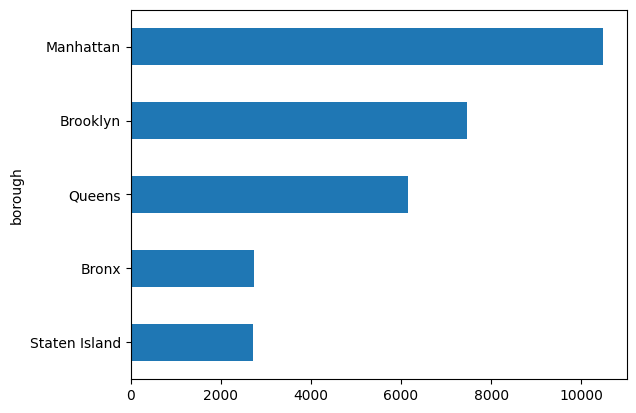

In [46]:
merged['borough'].value_counts().sort_values().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [47]:
pop_df = pd.read_csv('boro_population.csv')

In [50]:
pop_df.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [51]:
second_merged = merged.merge(pop_df, left_on='borough', right_on='borough')
second_merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18,Upper West Side,10024,Manhattan,1644518,23
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12,Southeast Bronx,10461,Bronx,1455444,42
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013,Manhattan,1644518,23
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17,Upper West Side,10025,Manhattan,1644518,23
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013,Manhattan,1644518,23


OK, now we can look at dogs per capita.

In [ ]:
dogs_per_capita = (
    second_merged
      .groupby('borough')
      .agg(
          dogs = ('borough', 'size'),
          # this counts the number of dogs ('size' counts all rows in the 'borough' column) for each borough
          population = ('population', 'first')  
          # this grabs the first value in the population column, for each borough
      )
      .assign(
          dogs_per_capita = lambda df: df['dogs'] / df['population']
      )
      
)

dogs_per_capita

,dogs,population,dogs_per_capita
borough,,,
Bronx,2748,1455444,0.001888
Brooklyn,7466,2636735,0.002832
Manhattan,10478,1644518,0.006371
Queens,6154,2339150,0.002631
Staten Island,2727,474558,0.005746


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [ ]:
import matplotlib.pyplot as plt

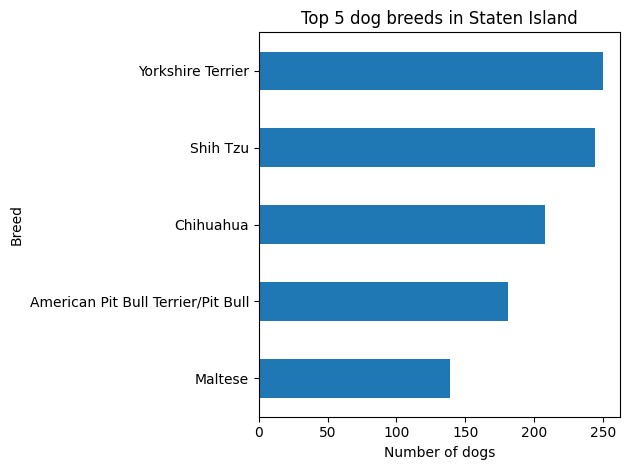

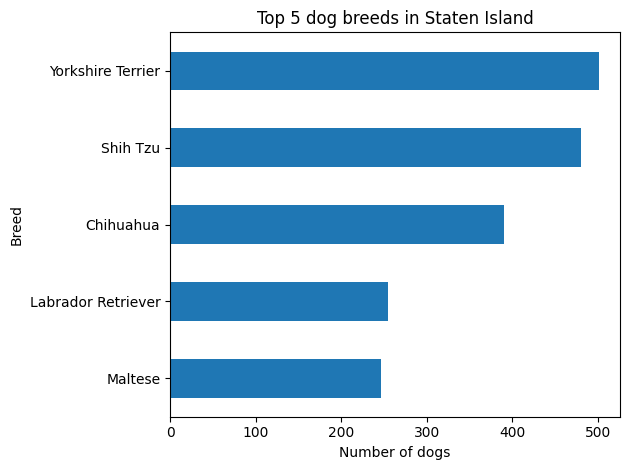

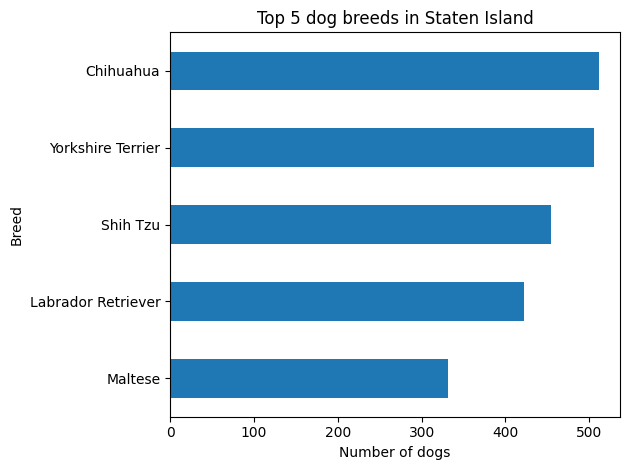

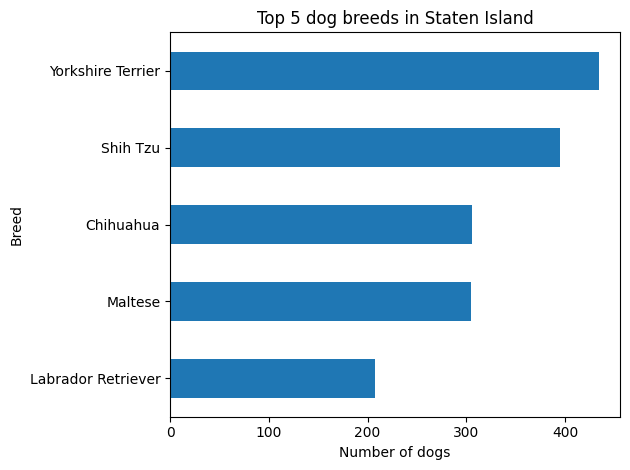

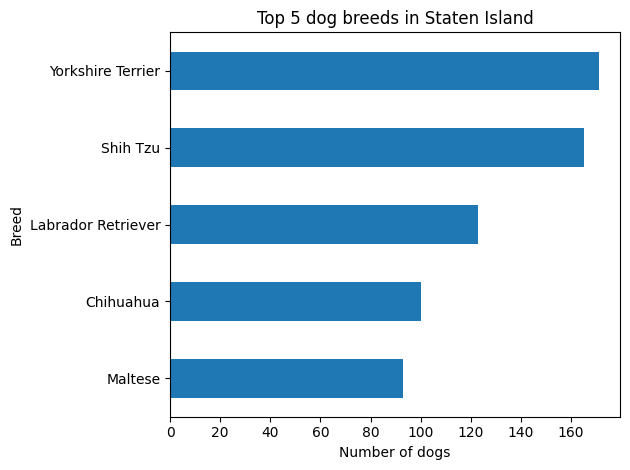

In [66]:
for borough_name, borough_data in second_merged.groupby('borough'):
    (borough_data['Primary Breed']
         .value_counts()
         .head(5)
         .sort_values()
         .plot.barh(
             title = f'Top 5 dog breeds in {borough}',
             xlabel = 'Number of dogs',
             ylabel = 'Breed',
             )

    )
    plt.tight_layout()
    plt.show()


(I got help from ChatGPT here. I *think* I understand how this works.)